# K-Nearest-Neighbor

• Euclidean Distance: $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

• Manhattan Distance: $\mid {x_1 - x_2}\mid + \mid{y_1 - y_2}\mid$

• Minkowski Distance: $(\mid {x_1 - x_2}\mid ^p+ \mid{y_1 - y_2}\mid^p)^\frac{1}{p}$ 

(with p = 2 --> Euclidian, p = 1 -->Manhattan):

• K is the number of similar entities to be identified. Check the complexity and a good value is 5

Algorithm's phases:

1) Choose the number of neighbors (k)

2) Choose a metric (for example: Manhattan distance)

3) Find the nearest-neighbor

4) Pick the most frequent class within the group

5) If it's draw, choose the class with less distance

In [6]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
digits = load_digits()

In [8]:
X = digits.data
Y = digits.target

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [5]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
#Check overfitting
Y_pred_train = knn.predict(X_train)
Y_prob_train = knn.predict_proba(X_train)

In [9]:
Y_pred_test = knn.predict(X_test)
Y_prob_test = knn.predict_proba(X_test)

In [10]:
accuracy_train = accuracy_score(Y_train, Y_pred_train)

In [11]:
accuracy_test = accuracy_score(Y_test, Y_pred_test)

In [12]:
loss_train = log_loss(Y_train, Y_prob_train)
loss_test = log_loss(Y_test, Y_prob_test)

In [13]:
print("Accuracy train: "+str(accuracy_train.round(5)) + ", Accuracy test: "
                            +str(accuracy_test.round(5)))

Accuracy train: 0.98966, Accuracy test: 0.98704


In [14]:
#We don't have overfittting!!

In [15]:
print("Log loss Train: "+ str(loss_train.round(5))+", Log loss Test: "+str(loss_test.round(5)))

Log loss Train: 0.02946, Log loss Test: 0.16291


• We can try to find a better performance for different k's values: 

In [16]:
Ks = [1,2,3,4,5,7,10,12,15,20]
for i in Ks:
    print("K="+str(i))
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    
    Y_pred_train = knn.predict(X_train)
    Y_prob_train = knn.predict_proba(X_train)
    
    Y_pred_test = knn.predict(X_test)
    Y_prob_test = knn.predict_proba(X_test)
    
    accuracy_train = accuracy_score(Y_train, Y_pred_train)
    accuracy_test = accuracy_score(Y_test, Y_pred_test)
    
    loss_train = log_loss(Y_train, Y_prob_train)
    loss_test = log_loss(Y_test, Y_prob_test)
    
    print("Accuracy train: "+str(accuracy_train.round(5)) + ", Accuracy test: "
                            +str(accuracy_test.round(5)))
    print("Log loss Train: "+ str(loss_train.round(5))+", Log loss Test: "+str(loss_test.round(5)))

K=1
Accuracy train: 1.0, Accuracy test: 0.98889
Log loss Train: 0.0, Log loss Test: 0.38376
K=2
Accuracy train: 0.98966, Accuracy test: 0.98333
Log loss Train: 0.00993, Log loss Test: 0.206
K=3
Accuracy train: 0.99125, Accuracy test: 0.98889
Log loss Train: 0.01639, Log loss Test: 0.15086
K=4
Accuracy train: 0.98886, Accuracy test: 0.97963
Log loss Train: 0.0233, Log loss Test: 0.1557
K=5
Accuracy train: 0.98966, Accuracy test: 0.98704
Log loss Train: 0.02946, Log loss Test: 0.16291
K=7
Accuracy train: 0.98966, Accuracy test: 0.98148
Log loss Train: 0.0423, Log loss Test: 0.17673
K=10
Accuracy train: 0.9825, Accuracy test: 0.97407
Log loss Train: 0.05844, Log loss Test: 0.13261
K=12
Accuracy train: 0.98091, Accuracy test: 0.97407
Log loss Train: 0.06682, Log loss Test: 0.14493
K=15
Accuracy train: 0.98011, Accuracy test: 0.96852
Log loss Train: 0.08233, Log loss Test: 0.15868
K=20
Accuracy train: 0.97454, Accuracy test: 0.95926
Log loss Train: 0.10757, Log loss Test: 0.18544


K = 3 is a good optimization, let's study the confusion matrix with this parameter:

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred_test = knn.predict(X_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

Number 8 classified like 3


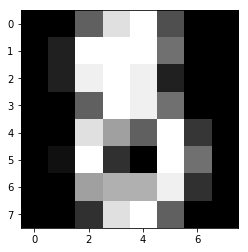

Number 8 classified like 3


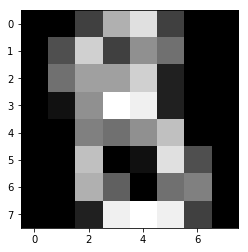

Number 5 classified like 9


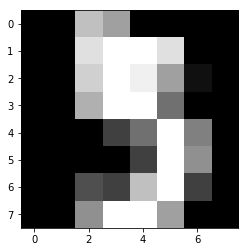

Number 4 classified like 7


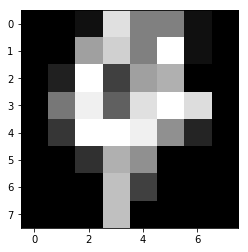

Number 1 classified like 5


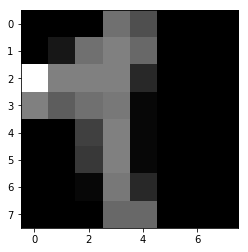

Number 5 classified like 6


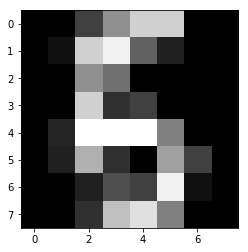

In [18]:
for i in range(0,len(X_test)):
    if(Y_pred_test[i] != Y_test[i]):
        print("Number %d classified like %d" %(Y_test[i], Y_pred_test[i]))
        
        plt.imshow(X_test[i].reshape([8,8]), cmap = "gray")
        plt.show()

Even a human eye would find it difficult for seeking the differences. The model performed very well

# Decision Trees

How does a decision tree during training choose which "questions" (split nodes) to ask? It chooses the question that maximizes information gain: The metric that measures how good the gain of information is called __impurity__. It is equal to zero if it contains only elements of a single class, in which case it is defined as __pure__. 

• To measure the impurity the model uses: __Gini__ or __Entropy__

• Decision Tree __doesn't__ need standardization or normalization

NB : _the deeper the Tree is, the higher the risk to overfitting_

In [9]:
titanic = pd.read_csv("http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

In [10]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [11]:
titanic = titanic.drop("Name", axis = 1)

In [12]:
 titanic = pd.get_dummies(titanic)

In [13]:
titanic.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [14]:
X = titanic.drop("Survived", axis = 1).values
Y = titanic["Survived"].values

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [16]:
X_train.shape

(620, 7)

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion ="gini")
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
Y_pred_train = tree.predict(X_train)
Y_pred = tree.predict(X_test)

In [20]:
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred)

In [22]:
print("Accuracy train: "+str(accuracy_train.round(4)) + " Accuracy test: "+str(accuracy_test.round(4)))

Accuracy train: 0.9806 Accuracy test: 0.7978


There is overfitting --> the model is too deep. 
Try to reduce the max_depth parameter: 

In [28]:
tree = DecisionTreeClassifier(criterion ="gini", max_depth = 6)
tree.fit(X_train, Y_train)
Y_pred_train = tree.predict(X_train)
Y_pred = tree.predict(X_test)

In [29]:
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred)
print("Accuracy train: "+str(accuracy_train.round(4)) + " Accuracy test: "+str(accuracy_test.round(4)))

Accuracy train: 0.8935 Accuracy test: 0.809


__Visualize the tree:__

In [36]:
from sklearn.tree import export_graphviz

In [37]:
dot_file = open("tree_tree","w") #create an empty file

In [38]:
export_graphviz(tree, out_file = dot_file, feature_names = titanic.columns.drop("Survived"))

In [39]:
dot_file.close()

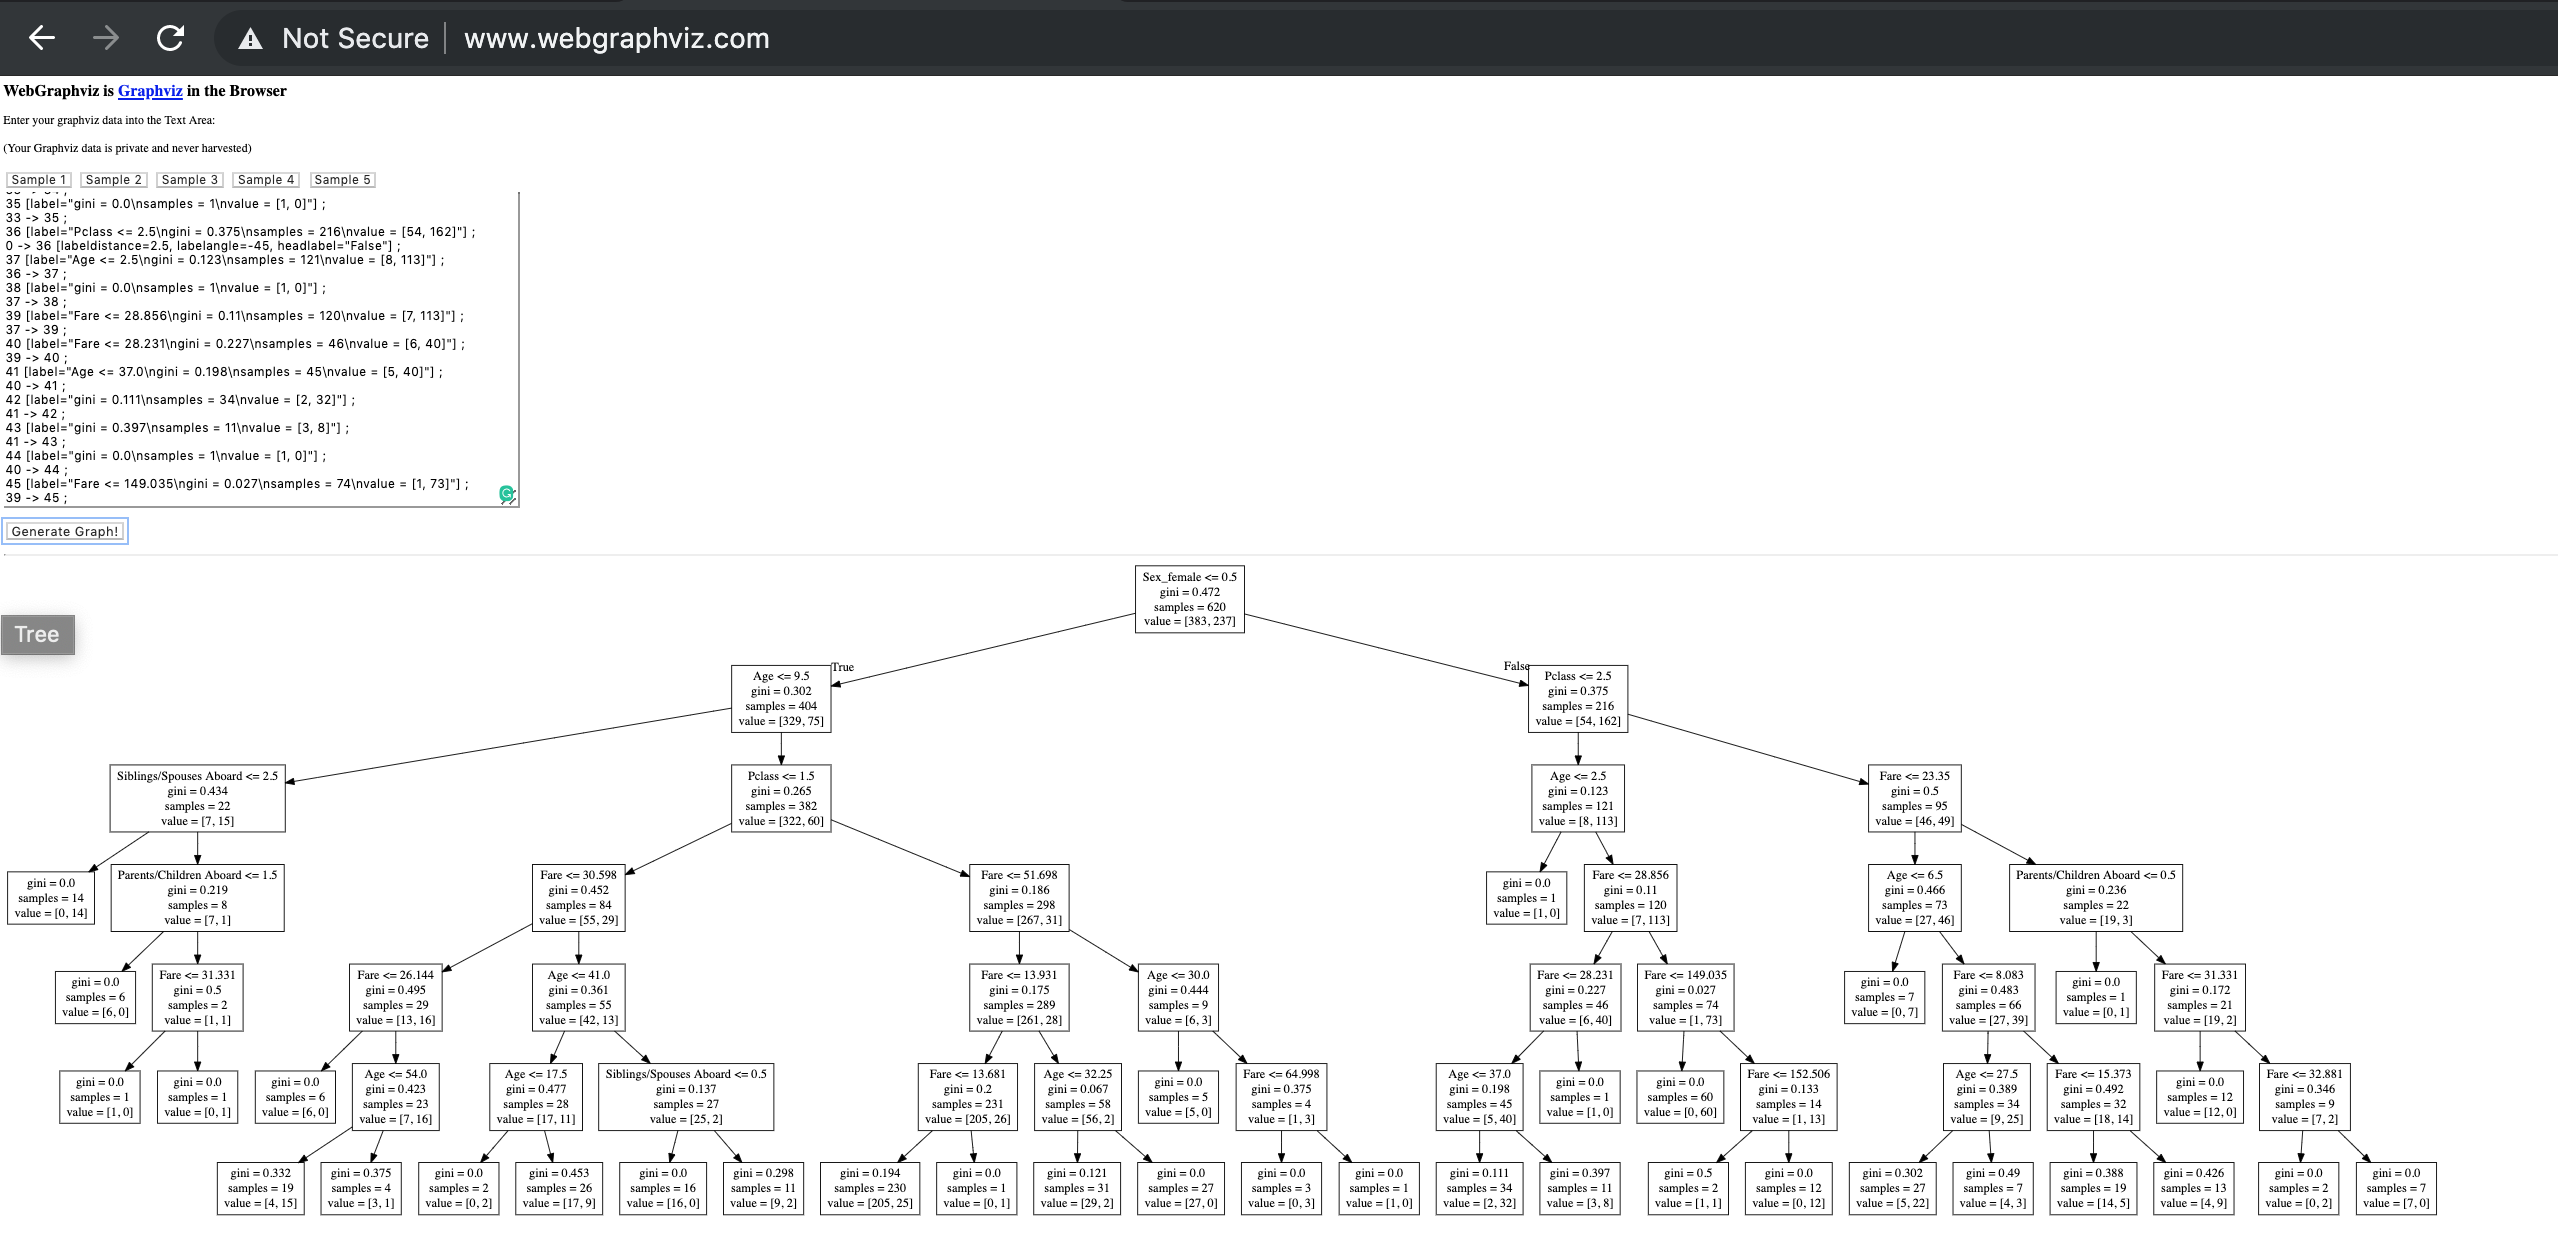

In [41]:
#Just copy and paste the txt file inside this website:
from IPython.display import Image
img = '/Users/lorenzofamiglini/Desktop/tree.png'
Image(filename=img)

# Random Forest

This model is based on ensemble learning (combine multiple models for creating one more robust):
    
• Better generalization
• Minor overfitting

Main phases: 

1) Choose the trees' number for the forest

2) Choose sample rows

3) Learn the tree with respect to the sample 

4) Repeat 2 and 3 until the end (to create the forest)

5) Make prediction for each trees and then compute the mean of the various predictions

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
forest = RandomForestClassifier(random_state=False, max_depth = 8, n_estimators=30)

In [30]:
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=False, verbose=0,
            warm_start=False)

In [31]:
Y_pred_train = forest.predict(X_train)
Y_pred = forest.predict(X_test)
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred)

In [32]:
print("Accuracy: Train = %.4f Test=%.4f" % (accuracy_train, accuracy_test))

Accuracy: Train = 0.9161 Test=0.8577
